#### Regression / Linear Model (LM) /  "Kleinste Quadrate" - einfache Variante

Einstiegsbeispiel mit einen Unbekannten (eine Input-Variable)
Simulierter Datenbestand PKW-Reparaturkosten nach Fahrleistung 

In [1]:
# Module laden
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Normalisierungsfunktionalität laden
from sklearn import preprocessing

In [2]:
pkw_kosten = pd.read_csv("D:/datasets/Kosten_PKW.csv",sep=",",encoding = "ISO-8859-1")
print("Struktur: \n",pkw_kosten.shape)
print("Die Spalten: \n", pkw_kosten.columns)
pkw_kosten.columns
print(pkw_kosten)

Struktur: 
 (100, 2)
Die Spalten: 
 Index(['Laufleistung', 'Reparaturkosten_in_Euro'], dtype='object')
    Laufleistung  Reparaturkosten_in_Euro
0        1992.03                    69.21
1        3984.06                   282.86
2        5976.10                   385.17
3        7968.13                   232.70
4        9960.16                   341.03
..           ...                      ...
95     191235.06                 13191.95
96     193227.09                 11188.88
97     195219.12                 10222.96
98     197211.16                 14100.70
99     199203.19                  6319.13

[100 rows x 2 columns]


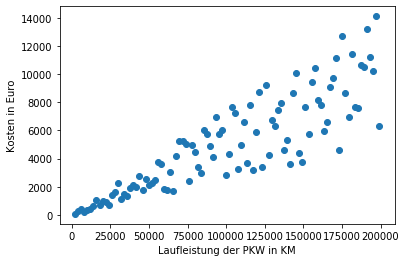

In [3]:
plt.scatter(pkw_kosten.Laufleistung,pkw_kosten.Reparaturkosten_in_Euro)
plt.xlabel('Laufleistung der PKW in KM')
plt.ylabel('Kosten in Euro')
#plt.legend(loc='upper left')
plt.show()

Input-/ Output-Variablen festlegen und Trainings- / Testdaten erzeugen

In [4]:
# Die Spalten des DataFrame aufteilen in Source und Target- Variablen  (X,y) 
#   und daraus einen array machen
X = np.array(pkw_kosten.Laufleistung)
y = np.array(pkw_kosten.Reparaturkosten_in_Euro)
#print(type(X))
#print(type(y))

# Trainings- und Test-Sätze erzeugen
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Reshape um das passende Format für den Algorithmus zu erhalten
X_train = X_train.reshape(-1, 1)         # array.reshape(-1,1) is nötig, damit der fit-Algorithmus nicht auf 
                                         #    einen Fehler läuft  (75,)   reshape -> (75, 1)


Modell trainieren und Vorhersage

In [6]:
# Modell entwickeln
lr = LinearRegression().fit(X_train, y_train)

In [7]:
X_test = X_test.reshape(-1, 1)
print("Test set predictions:\n", lr.predict(X_test))

Test set predictions:
 [2728.27659487 8760.16003086  315.52342234 5643.68676245 7654.31474267
 9463.88012674 1722.96260476 7453.25214652 5543.15546437 9664.94272289
 5442.6241663  9363.34832399 7955.90914157 1421.36871052  818.17991272
 3130.40229184 2326.15089789 2527.21399871 3431.99618608  918.71171547
 4437.31017619 6347.40685833  416.05472041 7252.18904569 4638.37327701]


Vorhersage eines neuen Wertes / operativer Einsatz

In [8]:
# Vorhersage von Echtwerten / Einsatz des gefundenen Modells in der Praxis

#Echtwert = np.array(213784)
#Echtwert = Echtwert.reshape(1,-1)

Echtwert = [[213784]]
#print(Echtwert)
#print("Vorhersage Echtwerte:\n", reg.predict([[213784.86]]))
print("Vorhersage Echtwerte:\n", lr.predict(Echtwert))

Vorhersage Echtwerte:
 [10802.91464524]


In [ ]:
Score-Werte erstellen / Modellgüte

In [9]:
# Vergleichen von Trainings- und Test-Score, 
#   um die Generalisierungsfähigkeit zu testen
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# Training set score: 0.67                        die Score-Werte sind zwar nahezu gleich 
# Test set score: 0.66                            aber  ein Wert um 77% Treffer sollte verbessert werden

Training set score: 0.75
Test set score: 0.77


Zusatzinformationen zu der hergeleiten Formel (y = ax + b)

In [ ]:
# Herleiten der linearen Formel   y = ax + b    also Zielvariable = Coeffient*Inputvariable  + Intercept
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

Visualisieren der Regressions-Linie

lr.coef_: [0.05046676]
lr.intercept_: 13.929023436293392


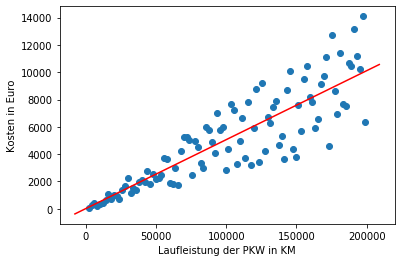

In [10]:
# Funktion zum Zeichnen der Abline-Linie 
# Diese Funktion kann nach der Ermittlung voon Intercept und Coeffient 
# aufgerufen werden
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color="red", linewidth=1.5)

# Kontrollausgabe
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
plt.scatter(pkw_kosten.Laufleistung,pkw_kosten.Reparaturkosten_in_Euro)
plt.xlabel('Laufleistung der PKW in KM')
plt.ylabel('Kosten in Euro')
#plt.legend(loc='upper left')
abline(lr.coef_,lr.intercept_)

In [32]:
#### Ridge regression  

versucht Overfitting durch Regularisierung zu vermeiden. 
Die Koeffizienten (im Prinzip die Gewichte der Attribute) werden dabei so klein wie möglich gewält. Der Einfluss der einzelnen Attribute wird damit so gering wie möglich gehalten.
Dieser Vorgang kann durch den sog. alpha-Parameter gesteuert werden.
Default = 1, erhöht man ihn, werden die Koeffizienten noch stärker gegen Null "gedrückt".
(In diesem Beispiel mit nur einer Ziel-Variablen macht Rigde und erst recht Lasso wenig Sinn)

In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)                # alpha-Paramter auf 1 (Default)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.77


In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.77


In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.77
